In [2]:
import pandas as pd
import altair as alt
import numpy as np

In [14]:
df = pd.DataFrame({'id': np.arange(10)},dtype=np.int8)
df['a1'] = np.linspace(0,5,10)
df['a2'] = df['a1'] + 1
df['a3'] = df['a1'] + 2
#
df['b1'] = np.linspace(5,0,10)
df['b2'] = df['b1']*2
df['b3'] = df['b1']*4
df

,id,a1,a2,a3,b1,b2,b3
0,0,0.000000,1.000000,2.000000,5.000000,10.000000,20.000000
1,1,0.555556,1.555556,2.555556,4.444444,8.888889,17.777778
2,2,1.111111,2.111111,3.111111,3.888889,7.777778,15.555556
3,3,1.666667,2.666667,3.666667,3.333333,6.666667,13.333333
4,4,2.222222,3.222222,4.222222,2.777778,5.555556,11.111111
5,5,2.777778,3.777778,4.777778,2.222222,4.444444,8.888889
6,6,3.333333,4.333333,5.333333,1.666667,3.333333,6.666667
7,7,3.888889,4.888889,5.888889,1.111111,2.222222,4.444444
8,8,4.444444,5.444444,6.444444,0.555556,1.111111,2.222222
9,9,5.000000,6.000000,7.000000,0.000000,0.000000,0.000000


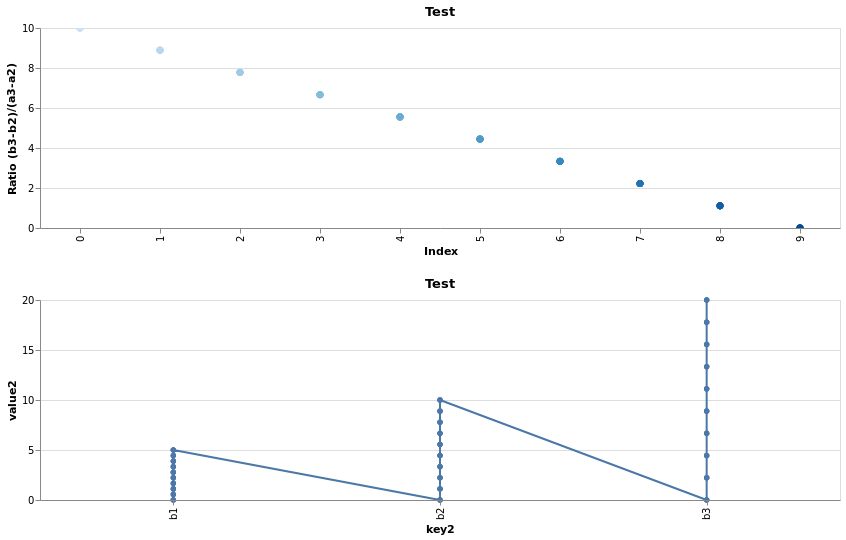

In [38]:
selector = alt.selection_single(empty='all', fields=['id'])

base = alt.Chart(df).properties(
    title="Test",width=800,height=200).add_selection(selector).transform_fold(
    ['a1','a2','a3'],
    as_=["key1","value1"]).transform_fold(
    ['b1','b2','b3'],
    as_=["key2","value2"])

points = base.mark_point(filled=True, size=50).encode(
    x=alt.X(
        'id:N',
        axis=alt.Axis(title='Index')
    ),
    y=alt.Y(
        'ratio:Q',
        axis=alt.Axis(title="Ratio (b3-b2)/(a3-a2)")
    ),
    color=alt.condition(selector, 'a1', alt.value('lightgray'), legend=None),
    tooltip=['id']
).transform_calculate(
    ratio="(datum.b3-datum.b2)/(datum.a3-datum.a2)").interactive()

sed1 = base.mark_line(point=True).encode(
    x='key2:N',
    y='value2:Q',
#    y2='value2:Q'
).transform_filter(
    selector
    )
#sed1 = base.mark_line(point=True).encode(
#    x='key1:N',
#    y=alt.Y(
#        'value1:Q',
#        axis=alt.Axis(title='Y-axis'))).transform_filter(
#    selector
#    )

#sed2 = base.mark_line(point=True).encode(
#    x='key1:N',
#    y=alt.Y(
#        'value2:Q')).transform_filter(
#    selector
#    )


alt.vconcat(points,sed1)
